# Basic usage example

In [9]:
module_path = '../../eagleeye'
import sys
sys.path.append(module_path)
import EagleEye
from utils_EE import compute_the_null, partitioning_function

In [14]:
anom = np.loadtxt('eagle.csv')
N    = 4000 + len(anom)
X    = np.random.uniform(0, 1, size=(N, 2))
Y    = np.concatenate((anom,np.random.uniform(0, 1, size=(N-len(anom), 2))))

(5838, 2) (5838, 2)


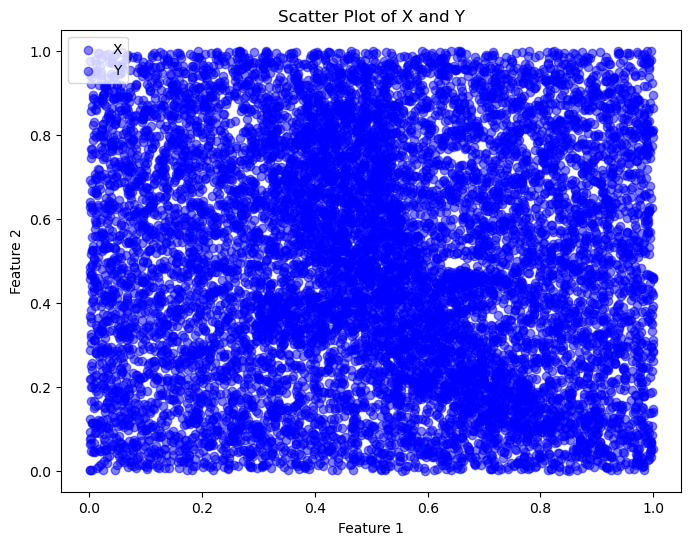

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', label='X', alpha=0.2)
plt.scatter(Y[:, 0], Y[:, 1], c='gray', label='Y', alpha=0.2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of X and Y')
plt.show()

In [17]:
#%% EagleEye hyperparameters

p       = len(Y)/(len(Y)+len(X))

K_M     = 500

p_ext   = 1e-5

n_jobs  = 10

In [18]:
stats_null                     = compute_the_null(p=p, K_M=K_M)


In [20]:
#%% Eagle Soar!
import importlib
importlib.reload(EagleEye)
import time
t = time.time()
result_dict, stats_null = EagleEye.Soar(X, Y, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={})
elapsed17alt = time.time() - t
print(f'Elapsed time: {elapsed17alt} seconds')


-----------------------------------------------------------------
Eagle...Soar!
-----------------------------------------------------------------
Compute the nearest neighbours
KNN completed: 0.00 %
KNN completed: 85.65 %
-----------------------------------------------------------------
Flagging of putative anomalous points
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

-----------------------------------------------------------------
Pruning via iterative density equalization (IDE)
-----------------------------------------------------------------


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

Elapsed time: 105.29999279975891 seconds


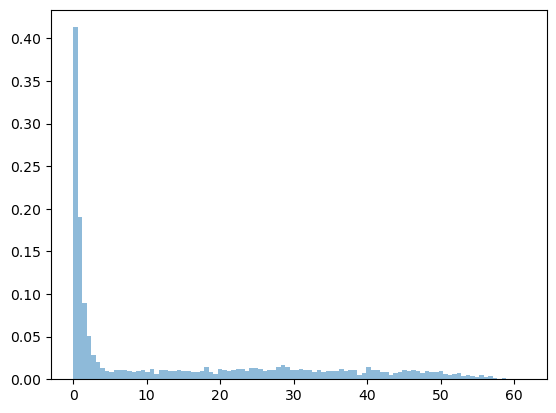

In [22]:
h = plt.hist(result_dict['Upsilon_i_Y'], bins=100, alpha=0.5, label='Upsilon_i_Y', density=True)

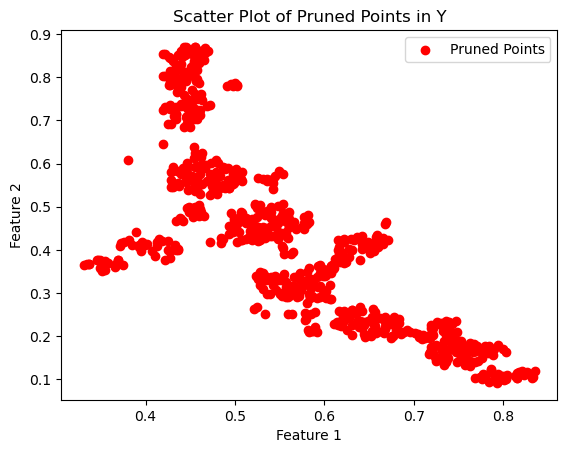

In [25]:
pruned = result_dict['Y_Pruned'][1e-05]
plt.scatter(Y[pruned, 0], Y[pruned, 1], c='r', label='Pruned Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Pruned Points in Y')
plt.legend()
plt.show()


In [29]:
#%% Cluter the Putative anomalies

clusters = partitioning_function(X,Y,result_dict,p_ext=p_ext,Z=2.65 )

#%% Repêchage

EE_book = EagleEye.Repechage(X,Y,result_dict,clusters,p_ext=1e-5)

-----------------------------------------------------------------
Clustering


/scratch/ascaffid/anaconda3/lib/python3.11/site-packages/dadapy/_utils/utils.py:152: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/scratch/ascaffid/anaconda3/lib/python3.11/site-packages/dadapy/id_estimation.py:176: RuntimeWarning: divide by zero encountered in divide
  mus = self.distances[:, 2] / self.distances[:, 1]


-----------------------------------------------------------------
-----------------------------------------------------------------
Repêchage
-----------------------------------------------------------------


<IPython.core.display.Math object>

alpha = 1


'DONE!'

<IPython.core.display.Math object>

alpha = 1
alpha = 2
alpha = 3
alpha = 4


'DONE!'

In [ ]:
putative  = EE_book['Y_OVER_clusters'][0]['Putative']
pruned    = EE_book['Y_OVER_clusters'][0]['Pruned']
repechage = EE_book['Y_OVER_clusters'][0]['Repechaged']

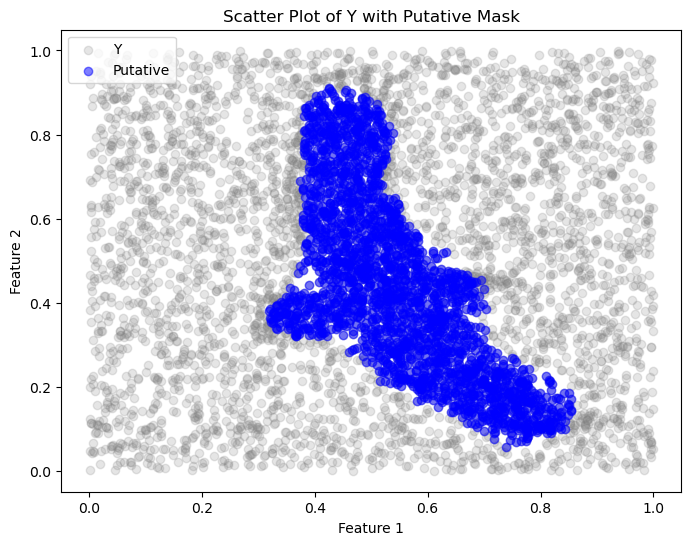

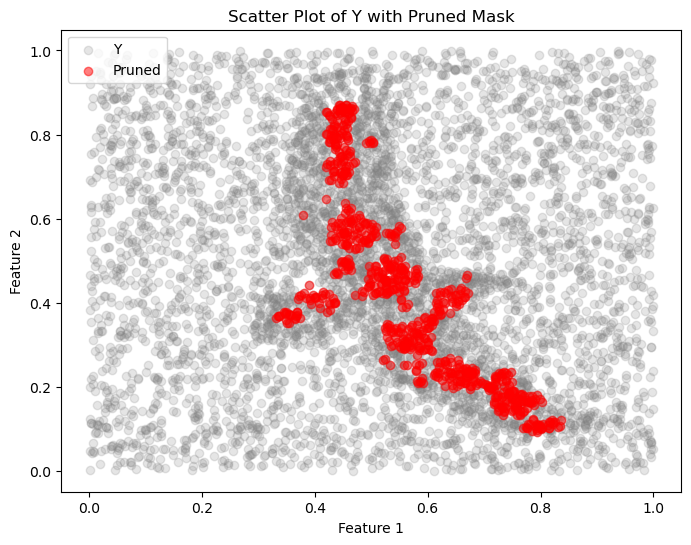

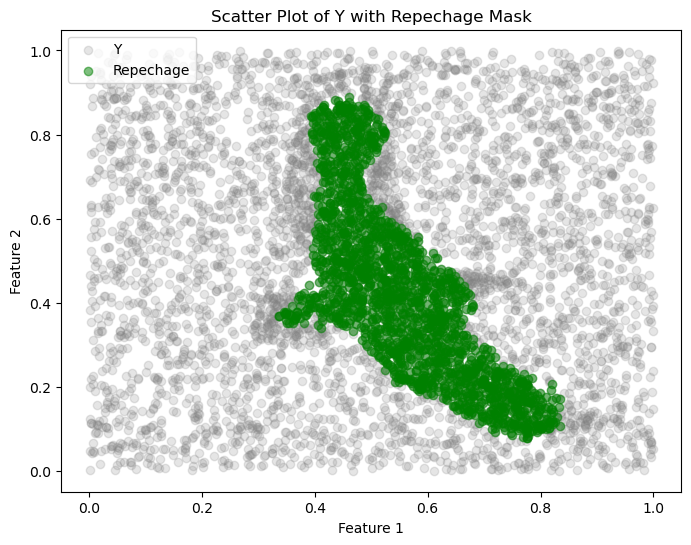

In [39]:
import matplotlib.pyplot as plt

# Plot scatter of Y with the 'putative' mask
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c='gray', label='Y', alpha=0.2)
plt.scatter(Y[putative, 0], Y[putative, 1], c='blue', label='Putative', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Y with Putative Mask')
plt.legend()
plt.show()

# Plot scatter of Y with the 'pruned' mask
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c='gray', label='Y', alpha=0.2)
plt.scatter(Y[pruned, 0], Y[pruned, 1], c='red', label='Pruned', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Y with Pruned Mask')
plt.legend()
plt.show()

# Plot scatter of Y with the 'repechage' mask
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c='gray', label='Y', alpha=0.2)
plt.scatter(Y[repechage, 0], Y[repechage, 1], c='green', label='Repechage', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Y with Repechage Mask')
plt.legend()
plt.show()

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'eaglee.1.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Convert image to a numpy array
image_array = np.array(image)

image_array.shape


(870, 638)

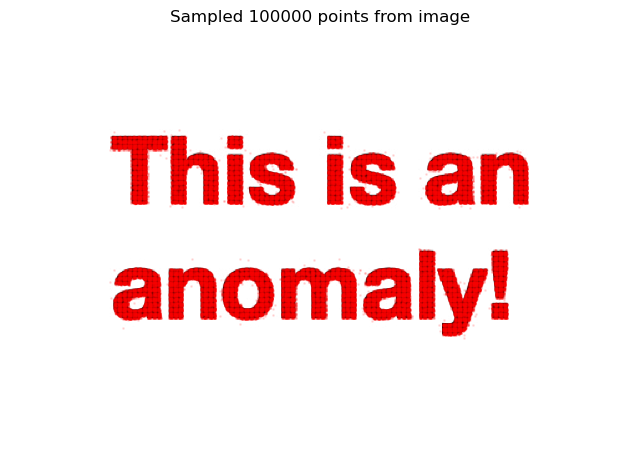

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = 'text.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)

# Compute weights: darkest pixels get weight 1, white pixels (value 255) get weight 0.
weights = (255 - image_array) / 255.0
# Ensure that any pixel with value 255 gets zero weight explicitly:
weights[image_array == 255] = 0

# Flatten weights and create a probability distribution
weights_flat = weights.flatten()
total_weight = np.sum(weights_flat)
if total_weight == 0:
    raise ValueError("The image contains only white pixels.")
probabilities = weights_flat / total_weight

# Total number of points to sample
N = 100000

# Randomly sample pixel indices according to the computed probabilities
indices = np.random.choice(len(probabilities), size=N, p=probabilities)

# Convert flat indices back to 2D (row, col) coordinates
rows, cols = np.unravel_index(indices, image_array.shape)

# Plot the original image and overlay the sampled points
plt.figure(figsize=(8, 8))
plt.imshow(image_array, cmap='gray', origin='upper')
plt.scatter(cols, rows, s=1, c='red', alpha=0.1)
plt.title(f"Sampled {N} points from image")
plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = 'text.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_array = np.array(image)
height, width = image_array.shape

# ---------------------------
# Generate Uniform Background Point Cloud
# ---------------------------
N_uniform = 200000
uniform_rows = np.random.randint(0, height, size=N_uniform)
uniform_cols = np.random.randint(0, width, size=N_uniform)

# ---------------------------
# Generate Image-based (anomaly) Point Cloud with Gaussian jitter
# ---------------------------
# Compute weights: darkest pixels get weight 1, white pixels (255) get weight 0.
weights = (255 - image_array) / 255.0
weights[image_array == 255] = 0  # Explicitly set white pixels to zero weight

# Flatten weights and create probability distribution
weights_flat = weights.flatten()
total_weight = np.sum(weights_flat)
if total_weight == 0:
    raise ValueError("The image contains only white pixels.")
probabilities = weights_flat / total_weight

N_image = 50000
indices = np.random.choice(len(probabilities), size=N_image, p=probabilities)
rows_image, cols_image = np.unravel_index(indices, image_array.shape)

# Add Gaussian jitter around each pixel center.
sigma = 0.3  # Standard deviation for the jitter (in pixel units)
jitter_x = np.random.randn(N_image) * sigma
jitter_y = np.random.randn(N_image) * sigma

# The final (x, y) coordinates with jitter. Note: x corresponds to column, y to row.
cols_image_jitter = cols_image + jitter_x
rows_image_jitter = rows_image + jitter_y




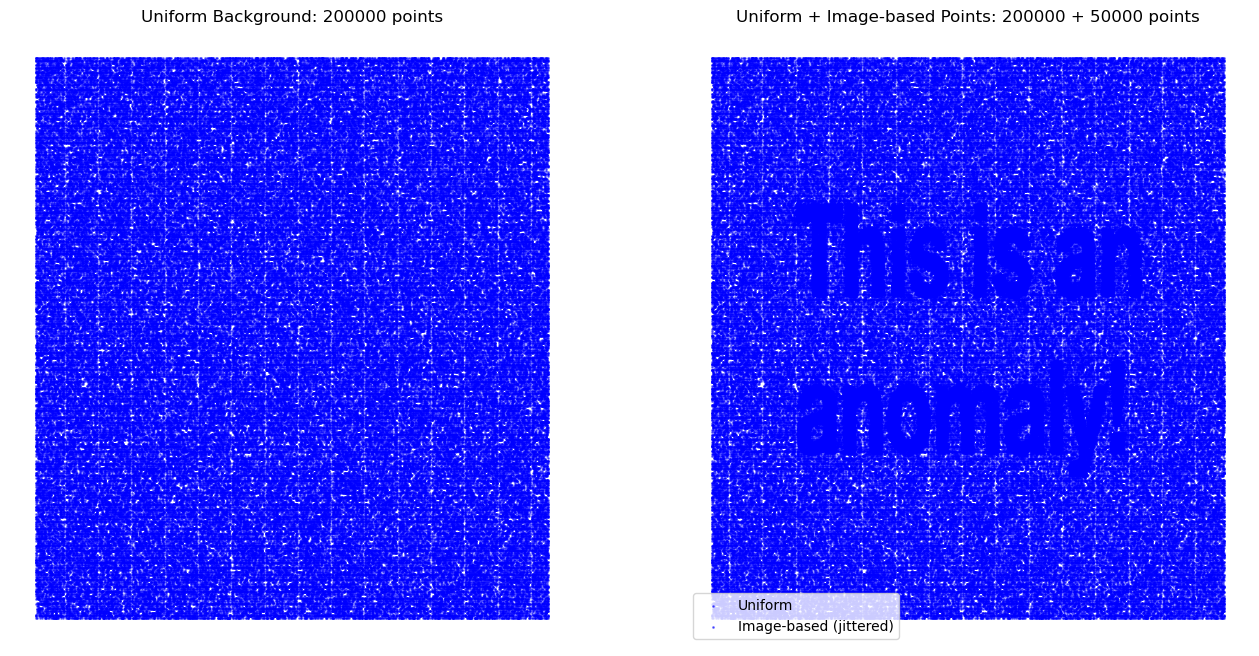

In [101]:
# ---------------------------
# Plotting the Two Cases
# ---------------------------
plt.figure(figsize=(16, 8))

# 1. Uniform background only
plt.subplot(1, 2, 1)
plt.scatter(uniform_cols, uniform_rows, s=1, c='blue', alpha=0.5)
plt.title(f"Uniform Background: {N_uniform} points")
plt.axis('off')
plt.gca().invert_yaxis()

# 2. Uniform background + image-based points (with Gaussian jitter)
plt.subplot(1, 2, 2)
plt.scatter(uniform_cols, uniform_rows, s=1, c='blue', alpha=0.5, label='Uniform')
plt.scatter(cols_image_jitter, rows_image_jitter, s=1, c='blue', alpha=0.5, label='Image-based (jittered)')
plt.title(f"Uniform + Image-based Points: {N_uniform} + {N_image} points")
plt.legend()
plt.axis('off')
plt.gca().invert_yaxis()

plt.show()

In [102]:
# Create dataset X from the uniform background
X = np.column_stack((uniform_cols, uniform_rows))

# Create dataset Y from the uniform background + image points
Y = np.vstack((np.column_stack((uniform_cols, uniform_rows)), np.column_stack((cols_image, rows_image))))

In [103]:
#%% EagleEye hyperparameters
module_path = '../../eagleeye'
import sys
sys.path.append(module_path)
import EagleEye
from utils_EE import compute_the_null, partitioning_function
p       = len(Y)/(len(Y)+len(X))

K_M     = 500

p_ext   = 1e-5

n_jobs  = 10

In [104]:
stats_null                     = compute_the_null(p=p, K_M=K_M)


In [ ]:
#%% Eagle Soar!
import importlib
importlib.reload(EagleEye)
import time
t = time.time()
result_dict, stats_null = EagleEye.Soar(X, Y, K_M=K_M, p_ext=p_ext, n_jobs=n_jobs, stats_null=stats_null, result_dict_in={},do_IDE=False)
elapsed17alt = time.time() - t
print(f'Elapsed time: {elapsed17alt} seconds')


-----------------------------------------------------------------
Eagle...Soar!
-----------------------------------------------------------------
Compute the nearest neighbours
KNN completed: 0.00 %
KNN completed: 2.22 %
KNN completed: 4.44 %
KNN completed: 6.67 %
KNN completed: 8.89 %
KNN completed: 11.11 %
KNN completed: 13.33 %
KNN completed: 15.56 %
KNN completed: 17.78 %
KNN completed: 20.00 %
KNN completed: 22.22 %
KNN completed: 24.44 %
KNN completed: 26.67 %
KNN completed: 28.89 %
KNN completed: 31.11 %
KNN completed: 33.33 %
KNN completed: 35.56 %
KNN completed: 37.78 %
KNN completed: 40.00 %
KNN completed: 42.22 %
KNN completed: 44.44 %
KNN completed: 46.67 %
KNN completed: 48.89 %
KNN completed: 51.11 %
KNN completed: 53.33 %
KNN completed: 55.56 %
KNN completed: 57.78 %
KNN completed: 60.00 %
KNN completed: 62.22 %
KNN completed: 64.44 %
KNN completed: 66.67 %
KNN completed: 68.89 %
KNN completed: 71.11 %
KNN completed: 73.33 %
KNN completed: 75.56 %
KNN completed: 77.78 %


<IPython.core.display.Math object>

'DONE!'

<IPython.core.display.Math object>

'DONE!'

Elapsed time: 53.006465435028076 seconds


In [106]:
result_dict['stats_null']

{0.5555555555555556: array([2.65, 5.62, 0.95, ..., 1.88, 4.02, 0.88]),
 0.4444444444444444: array([0.75, 0.65, 4.8 , ..., 0.96, 1.1 , 2.11])}

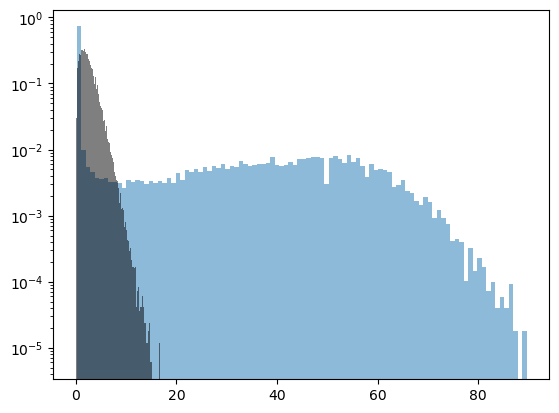

In [107]:
h = plt.hist(result_dict['Upsilon_i_Y'], bins=100, alpha=0.5, label='Upsilon_i_Y', density=True)
h = plt.hist(result_dict['stats_null'][0.5555555555555556], bins=100, alpha=0.5, label='Upsilon_i_X', density=True,color='k')
plt.yscale('log')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
import concurrent.futures
import seaborn as sns

def set_custom_style():
    sns.set(style="darkgrid")
    plt.rcParams.update({
        'figure.figsize': (22, 25),
        'axes.titlesize': 18,
        'axes.labelsize': 16,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'font.family': 'serif',
        'axes.grid': True,
        'grid.alpha': 0.3,
        'grid.linestyle': '--',
        'grid.color': 'gray',
        'text.usetex': True,
    })
set_custom_style()

# Define the range of thresholds for the animation:
thresholds = [0,0.1,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.99,1,1.1,1.2,1.3,2,3,4,5,6,8,10,11,16,25,26,27,28,30,31,32,35,37,40,40,40,40,40,40,40,40,40,40,40,40]

# Create figure with two subplots (scatter and histogram) arranged side-by-side
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 2, width_ratios=[2, 2])
ax_scatter = fig.add_subplot(gs[0])
ax_hist = fig.add_subplot(gs[1])

# Set axis limits and invert y for scatter plot
height, width = image_array.shape
ax_scatter.set_xlim(0, width)
ax_scatter.set_ylim(0, height)
ax_scatter.invert_yaxis()

# Initialize scatter plot (empty for now)
scatter = ax_scatter.scatter([], [], c='blue', label='Putative', alpha=0.4)

# Plot histogram using the data from result_dict; here we assume it’s 1D
hist_data = result_dict['Upsilon_i_Y']
ax_hist.hist(hist_data, bins=70, alpha=0.5, label='Upsilon_i_Y', density=True)
threshold_line = ax_hist.axvline(0, color='red', linestyle='--', label='Threshold')
ax_hist.set_xlabel(r'$\mathbf{\Upsilon}_i$')
ax_hist.set_ylabel('Density')
ax_hist.set_yscale('log')

# Remove axis tick labels from the left plot
ax_scatter.set_xticks([])
ax_scatter.set_yticks([])


In [132]:

# -----------------------------------------------------------------------------
# Precompute frame data in parallel: for each threshold compute the putative mask 
# and corresponding scatter offsets.
def compute_frame_data(threshold):
    # Compute putative mask (Boolean array) where Upsilon_i_Y > threshold
    putative = result_dict['Upsilon_i_Y'] > threshold
    # Select the corresponding Y coordinates
    offsets = Y[putative]
    return offsets, threshold

# Use a ThreadPoolExecutor to precompute data for all thresholds in parallel.
with concurrent.futures.ThreadPoolExecutor(max_workers=50) as executor:
    frames_data = list(executor.map(compute_frame_data, thresholds))
    
# -----------------------------------------------------------------------------
# Update function for the animation uses precomputed frames_data
def update(frame):
    offsets, current_threshold = frames_data[frame]
    scatter.set_offsets(offsets)
    ax_scatter.set_title(r'$\mathbf{\Upsilon}_i > \mathbf{\Upsilon}_+^* = $ %1.1F' %current_threshold)
    threshold_line.set_xdata(current_threshold)
    print("Done frame:", frame)
    return scatter, threshold_line

# Create animation using the precomputed data.
ani = animation.FuncAnimation(fig, update, frames=len(thresholds), interval=200, repeat=True, blit=False)
ani.save('putative_threshold_with_histogram.gif', writer='pillow', fps=5)



/tmp/ipykernel_2582562/3546121288.py:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  threshold_line.set_xdata(current_threshold)


Done frame: 0
Done frame: 0
Done frame: 1
Done frame: 2
Done frame: 3
Done frame: 4
Done frame: 5
Done frame: 6
Done frame: 7
Done frame: 8
Done frame: 9
Done frame: 10
Done frame: 11
Done frame: 12
Done frame: 13
Done frame: 14
Done frame: 15
Done frame: 16
Done frame: 17
Done frame: 18
Done frame: 19
Done frame: 20
Done frame: 21
Done frame: 22
Done frame: 23
Done frame: 24
Done frame: 25
Done frame: 26
Done frame: 27
Done frame: 28
Done frame: 29
Done frame: 30
Done frame: 31
Done frame: 32
Done frame: 33
Done frame: 34
Done frame: 35
Done frame: 36
Done frame: 37
Done frame: 38
Done frame: 39
Done frame: 40
Done frame: 41
Done frame: 42
Done frame: 43
Done frame: 44


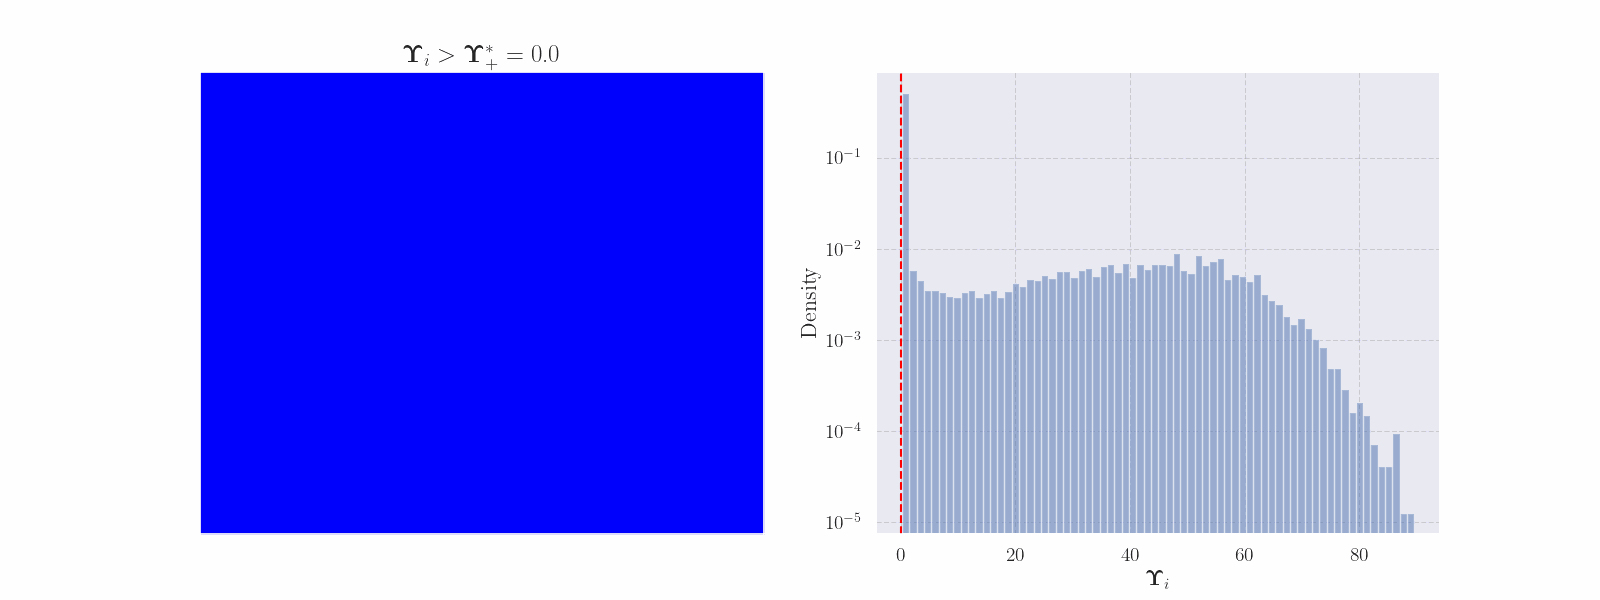

In [133]:
from IPython.display import Image as IPImage, display

# Display the GIF
display(IPImage(filename='putative_threshold_with_histogram.gif'))